## Dataset:
Training: https://www.kaggle.com/c/fake-news/data?select=train.csv
Testing : https://www.kaggle.com/c/fake-news/data?select=test.csv

###### Import Liabraries:

In [1]:
import pandas as pd
import numpy as np
import itertools
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
df = pd.read_csv('C:/Users/shyam/Desktop/Fake_News_Classifier/train.csv')
df_test = pd.read_csv('C:/Users/shyam/Desktop/Fake_News_Classifier/test.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.drop(['id'],axis=1, inplace=True)
df['title']=df['title'].str.lower()
df.head()

,title,author,text,label
0,house dem aide: we didn’t even see comey’s let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"flynn: hillary clinton, big woman on campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,why the truth might get you fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 civilians killed in single us airstrike hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#### Removing Stopwords

In [4]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# Removing stop words which are unneccesary from headline news
def remove_stopwords(text):
    final_text = []
    #df['text'].astype(str)
    for i in str(text).split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [5]:
df['title']=df['title'].apply(remove_stopwords)

In [6]:
spec_chars = ["-","!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, '')
    

df.head()

<ipython-input-6-156f02f35231>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['title'] = df['title'].str.replace(char, '')


,title,author,text,label
0,house dem aide didn’t even see comey’s letter ...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,flynn hillary clinton big woman campus breitbart,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,truth might get fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 civilians killed single us airstrike identi...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,iranian woman jailed fictional unpublished sto...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
X = np.array(df['title'])
y = np.array(df.label)
X.shape
X.reshape(-1,1)

array([['house dem aide didn’t even see comey’s letter jason chaffetz tweeted'],
       ['flynn hillary clinton big woman campus breitbart'],
       ['truth might get fired'],
       ...,
       ['macy’s said receive takeover approach hudson’s bay new york times'],
       ['nato russia hold parallel exercises balkans'],
       ['keeps f35 alive']], dtype=object)

#### Dataset Spliting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

## 1. BAG OF WORDS:

In [9]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

### 1.1 Naive Bayes

Accuracy (in percentage):   89.865
Confusion matrix, without normalization


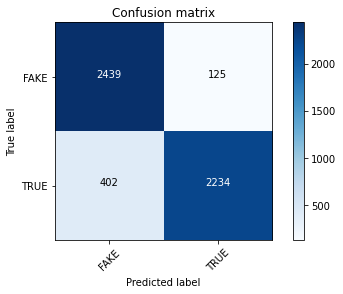

In [10]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

 ### 1.2 Logistic Regression

Accuracy (in percentage):   94.058
Confusion matrix, without normalization


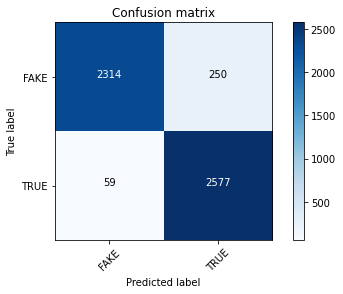

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 1.3 Decision Tree

Accuracy (in percentage):   92.654
Confusion matrix, without normalization


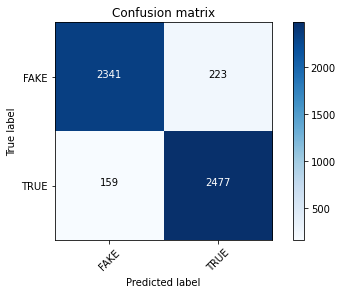

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(count_train, y_train)
pred = dt.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 1.4 Support Vector Machine

Accuracy (in percentage):   93.538
Confusion matrix, without normalization


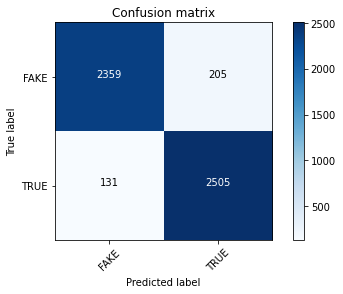

In [13]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel = 'linear', degree = 3, gamma = 'auto')
SVM.fit(count_train,y_train)
pred = SVM.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 1.5 Gradient Boosting

Accuracy (in percentage):   92.038
Confusion matrix, without normalization


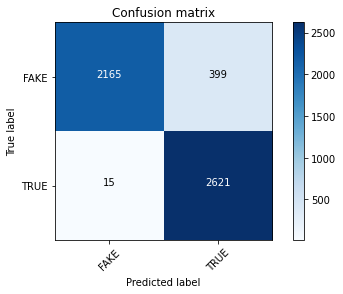

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(count_train, y_train)
pred = gbc.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

## 2. Term Frequency — Inverse Document Frequency:

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

### 2.1 Naive Bayes

Accuracy (in percentage):   88.615
Confusion matrix, without normalization


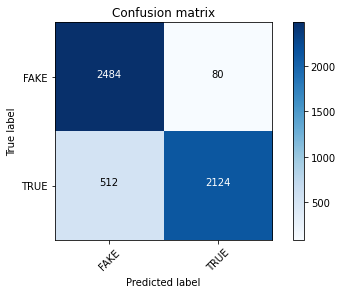

In [16]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 2.2 Logistic Regression

Accuracy (in percentage):   93.000
Confusion matrix, without normalization


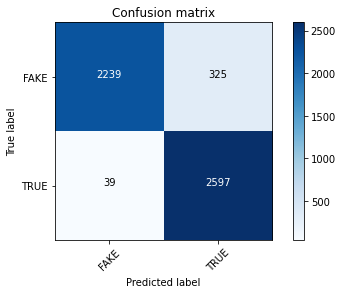

In [17]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train, y_train)
pred = log_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 2.3 Decision Tree

Accuracy (in percentage):   91.769
Confusion matrix, without normalization


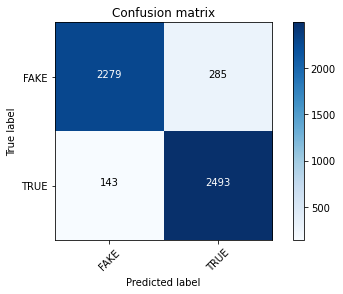

In [18]:
dt_tf = DecisionTreeRegressor()
dt_tf.fit(tfidf_train, y_train)
pred = dt_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 2.4 Support Vector Machine

Accuracy (in percentage):   94.462
Confusion matrix, without normalization


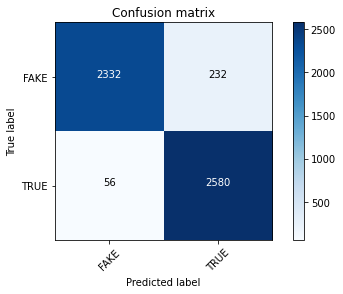

In [19]:
SVM_tf = svm.SVC(C=1.0, kernel = 'linear', degree = 3, gamma = 'auto')
SVM_tf.fit(tfidf_train,y_train)
pred = SVM_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])

### 2.5 Gradient Boosting

Accuracy (in percentage):   92.173
Confusion matrix, without normalization


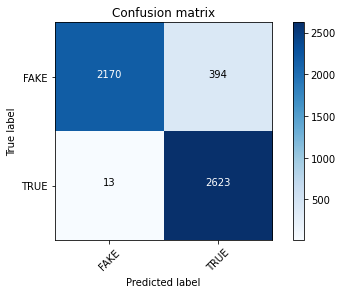

In [20]:
gbc_tf = GradientBoostingClassifier(random_state=0)
gbc_tf.fit(tfidf_train,y_train)
pred = gbc_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
z = score*100
print("Accuracy (in percentage):   %0.3f" % z)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'TRUE'])